In [97]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [98]:
pwd

'C:\\Users\\tusha\\Documents\\Data Science Course\\basic python assignments\\new assignments'

In [99]:
def download_data(url):
    response = requests.get(url)
    data = response.json()
    return data

In [100]:
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
data = download_data(url)


In [101]:
# Extract the required data attributes and create a DataFrame
episode_data = data['_embedded']['episodes']
df = pd.DataFrame(episode_data)

In [102]:
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        36 non-null     int64 
 1   url       36 non-null     object
 2   name      36 non-null     object
 3   season    36 non-null     int64 
 4   number    36 non-null     int64 
 5   type      36 non-null     object
 6   airdate   36 non-null     object
 7   airtime   36 non-null     object
 8   airstamp  36 non-null     object
 9   runtime   36 non-null     int64 
 10  rating    36 non-null     object
 11  image     36 non-null     object
 12  summary   36 non-null     object
 13  _links    36 non-null     object
dtypes: int64(4), object(10)
memory usage: 4.1+ KB


In [104]:
# Convert airdate to datetime format
df['airdate'] = pd.to_datetime(df['airdate'])


In [105]:
import re

import re

df['rating_value'] = df['rating'].apply(lambda x: re.search(r'\d+(\.\d+)?', str(x)).group() if isinstance(x, dict) else None)



In [106]:
df['rating_value'] = df['rating_value'].astype(float)


In [107]:
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,rating_value
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>A woman named Dolores is a free spirit in t...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,{'average': 7.7},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard suspects that someone is sabotaging...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.7
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,{'average': 7.6},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard continues to investigate Dolores' s...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.6
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,{'average': 7.9},{'medium': 'https://static.tvmaze.com/uploads/...,<p>While Dolores joins William and Logan on th...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.9
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,{'average': 8},{'medium': 'https://static.tvmaze.com/uploads/...,<p>Dolores takes the first step on her path of...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0


In [108]:
df.groupby('season')['rating_value'].mean()

season
1    8.0900
2    8.0000
3    7.7750
4    7.5375
Name: rating_value, dtype: float64

# Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.

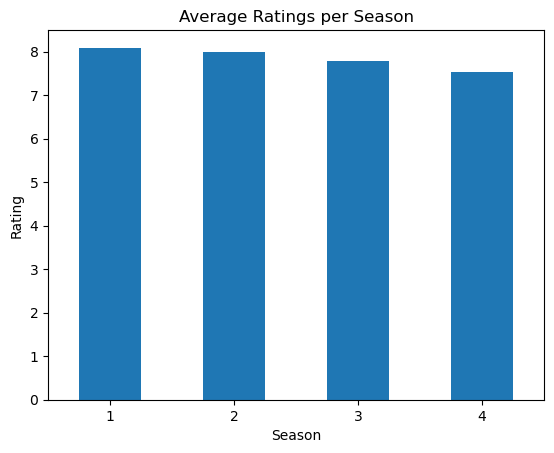

In [109]:
import matplotlib.pyplot as plt

# Extract season number and rating value
df['season'] = df['season'].astype(int)  # Convert season column to integer if needed
df['rating'] = df['rating'].apply(lambda x: float(x['average']) if isinstance(x, dict) else None)

# Group by season and calculate mean rating
season_ratings = df.groupby('season')['rating'].mean()

# Plot the ratings for each season
season_ratings.plot(kind='bar', xlabel='Season', ylabel='Rating', title='Average Ratings per Season')
plt.xticks(rotation=0)
plt.show()


# Get all the episode names, whose average rating is more than 8 for every season

In [110]:
df[df['rating'] > 8]

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,rating_value
6,938404,https://www.tvmaze.com/episodes/938404/westwor...,Trompe L'Oeil,1,7,regular,2016-11-13,21:00,2016-11-14T02:00:00+00:00,60,8.6,{'medium': 'https://static.tvmaze.com/uploads/...,<p>While William and Dolores travel to the unc...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.6
8,943066,https://www.tvmaze.com/episodes/943066/westwor...,The Well-Tempered Clavier,1,9,regular,2016-11-27,21:00,2016-11-28T02:00:00+00:00,60,8.5,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Bernard forces Robert to take him back into...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.5
9,943067,https://www.tvmaze.com/episodes/943067/westwor...,The Bicameral Mind,1,10,regular,2016-12-04,21:00,2016-12-05T02:00:00+00:00,90,8.7,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Delores finds out the truth about William's...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.7
17,1459788,https://www.tvmaze.com/episodes/1459788/westwo...,Kiksuya,2,8,regular,2018-06-10,21:00,2018-06-11T01:00:00+00:00,60,8.7,{'medium': 'https://static.tvmaze.com/uploads/...,<p>Another of Westworld's Host revolutionaries...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.7
18,1459789,https://www.tvmaze.com/episodes/1459789/westwo...,Vanishing Point,2,9,regular,2018-06-17,21:00,2018-06-18T01:00:00+00:00,60,8.4,{'medium': 'https://static.tvmaze.com/uploads/...,<p>The Man learns that his grip on reality isn...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.4
19,1459790,https://www.tvmaze.com/episodes/1459790/westwo...,The Passenger,2,10,regular,2018-06-24,21:00,2018-06-25T01:00:00+00:00,90,8.5,{'medium': 'https://static.tvmaze.com/uploads/...,"<p>The Man faces a personal reckoning, while A...",{'self': {'href': 'https://api.tvmaze.com/epis...,8.5


In [111]:
# Filter episodes with average rating > 8
high_rated_episodes = df[df['rating'] > 8]

In [112]:
# Group by season and extract episode names
high_rated_episodes.groupby('season')['name'].apply(list)


season
1    [Trompe L'Oeil, The Well-Tempered Clavier, The...
2            [Kiksuya, Vanishing Point, The Passenger]
Name: name, dtype: object

In [113]:
season_episode_names = high_rated_episodes.groupby('season')['name'].apply(list)

In [114]:
# Print episode names for each season
for season, episode_names in season_episode_names.items():
    print(f"Season {season} Episode Names:")
    for episode_name in episode_names:
        print(episode_name)
    print()

Season 1 Episode Names:
Trompe L'Oeil
The Well-Tempered Clavier
The Bicameral Mind

Season 2 Episode Names:
Kiksuya
Vanishing Point
The Passenger



# Get all the episode names that aired before May 2019

In [115]:
from datetime import datetime

In [116]:
# Convert 'airdate' column to datetime format
df['airdate'] = pd.to_datetime(df['airdate'])

In [117]:
df['airdate']

0    2016-10-02
1    2016-10-09
2    2016-10-16
3    2016-10-23
4    2016-10-30
5    2016-11-06
6    2016-11-13
7    2016-11-20
8    2016-11-27
9    2016-12-04
10   2018-04-22
11   2018-04-29
12   2018-05-06
13   2018-05-13
14   2018-05-20
15   2018-05-27
16   2018-06-03
17   2018-06-10
18   2018-06-17
19   2018-06-24
20   2020-03-15
21   2020-03-22
22   2020-03-29
23   2020-04-05
24   2020-04-12
25   2020-04-19
26   2020-04-26
27   2020-05-03
28   2022-06-26
29   2022-07-03
30   2022-07-10
31   2022-07-17
32   2022-07-24
33   2022-07-31
34   2022-08-07
35   2022-08-14
Name: airdate, dtype: datetime64[ns]

In [118]:
# Filter episodes aired before May 2019
filtered_episodes = df[df['airdate'] < datetime(2019, 5, 1)]

In [119]:
# Get episode names for the filtered episodes
episode_names = filtered_episodes['name'].tolist()

In [120]:
# Print the episode names
for episode_name in episode_names:
    print(episode_name)

The Original
Chestnut
The Stray
Dissonance Theory
Contrapasso
The Adversary
Trompe L'Oeil
Trace Decay
The Well-Tempered Clavier
The Bicameral Mind
Journey Into Night
Reunion
Virtù e Fortuna
The Riddle of the Sphinx
Akane No Mai
Phase Space
Les Écorchés
Kiksuya
Vanishing Point
The Passenger


In [121]:
# Group the DataFrame by 'season'
grouped_seasons = df.groupby('season')

In [122]:
# Initialize empty lists to store episode names
highest_rated_episodes = []
lowest_rated_episodes = []


In [123]:
# Iterate over each group
for season, group in grouped_seasons:
    # Find the episode with the highest rating in the season
    highest_rated_episode = group.loc[group['rating'].idxmax(), 'name']
    highest_rated_episodes.append(highest_rated_episode)

    # Find the episode with the lowest rating in the season
    lowest_rated_episode = group.loc[group['rating'].idxmin(), 'name']
    lowest_rated_episodes.append(lowest_rated_episode)


In [124]:
# Print the episode names with highest and lowest ratings in each season
for season, highest_rated, lowest_rated in zip(grouped_seasons.groups.keys(), highest_rated_episodes, lowest_rated_episodes):
    print(f"Season {season}: \nHighest Rated Episode - {highest_rated},\nLowest Rated Episode - {lowest_rated}")

Season 1: 
Highest Rated Episode - The Bicameral Mind,
Lowest Rated Episode - The Stray
Season 2: 
Highest Rated Episode - Kiksuya,
Lowest Rated Episode - Akane No Mai
Season 3: 
Highest Rated Episode - Parce Domine,
Lowest Rated Episode - Decoherence
Season 4: 
Highest Rated Episode - Zhuangzi,
Lowest Rated Episode - The Auguries


# Get the summary for the most popular ( ratings ) episode in every season


In [125]:
df['summary']=df['summary'].apply(lambda x : x.split('>')[1])

In [131]:
df['summary']=df['summary'].apply(lambda x : x.split('<')[0])

In [132]:
df.head()

,id,url,name,season,number,type,airdate,airtime,airstamp,runtime,rating,image,summary,_links,rating_value
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,21:00,2016-10-03T01:00:00+00:00,68,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,A woman named Dolores is a free spirit in the ...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,21:00,2016-10-10T01:00:00+00:00,60,7.7,{'medium': 'https://static.tvmaze.com/uploads/...,Bernard suspects that someone is sabotaging th...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.7
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,21:00,2016-10-17T01:00:00+00:00,60,7.6,{'medium': 'https://static.tvmaze.com/uploads/...,Bernard continues to investigate Dolores' supp...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.6
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,21:00,2016-10-24T01:00:00+00:00,60,7.9,{'medium': 'https://static.tvmaze.com/uploads/...,While Dolores joins William and Logan on their...,{'self': {'href': 'https://api.tvmaze.com/epis...,7.9
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,21:00,2016-10-31T01:00:00+00:00,60,8.0,{'medium': 'https://static.tvmaze.com/uploads/...,Dolores takes the first step on her path of di...,{'self': {'href': 'https://api.tvmaze.com/epis...,8.0


In [133]:
# Group the DataFrame by 'season'
grouped_seasons = df.groupby('season')


In [134]:
# Initialize an empty list to store episode summaries
popular_episode_summaries = []

In [135]:
# Iterate over each group
for season, group in grouped_seasons:
    # Find the episode with the highest rating in the season
    popular_episode_idx = group['rating'].idxmax()
    popular_episode_summary = group.loc[popular_episode_idx, 'summary']
    popular_episode_summaries.append(popular_episode_summary)

In [136]:
# Print the summary for the most popular episode in each season
for season, summary in zip(grouped_seasons.groups.keys(), popular_episode_summaries):
    print(f"Season {season}: \nMost Popular Episode Summary\n - {summary}")

Season 1: 
Most Popular Episode Summary
 - Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.
Season 2: 
Most Popular Episode Summary
 - Another of Westworld's Host revolutionaries is revealed. Meanwhile, Emily finds the Man and convinces the Ghost Nation to hand him over to her to ensure his suffering.
Season 3: 
Most Popular Episode Summary
 - If you're stuck in a loop, try walking in a straight line.
Season 4: 
Most Popular Episode Summary
 - God is bored.
